# Predict prices of Houses

This Juypter notebook can be used to predict prices of houses.

## Load Datasets

We load the datasets from the CSV (the trainingset and the test dataset)

In [96]:
# Package for linear regressions


import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# Import pandas
import pandas as pd

In [98]:
train_url = '/home/sleroy/git/ml/houses/train.csv'
test_url = '/home/sleroy/git/ml/houses/test.csv'
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)


In [99]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1201 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   Alley             91 non-null     object 
 7   LotShape          1460 non-null   object 
 8   LandContour       1460 non-null   object 
 9   Utilities         1460 non-null   object 
 10  LotConfig         1460 non-null   object 
 11  LandSlope         1460 non-null   object 
 12  Neighborhood      1460 non-null   object 
 13  Condition1        1460 non-null   object 
 14  Condition2        1460 non-null   object 
 15  BldgType          1460 non-null   object 
 16  HouseStyle        1460 non-null   object 


In [101]:
feature_cols = train.columns[1:-1]
feature_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'Feature1stFlrSF', 'Feature2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

## Extract the features from the categories


In [102]:
# you want all rows, and the feature_cols' columns
train_X = train.loc[:, feature_cols]
test_X = test

In [103]:
train_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [104]:
train_y =  train.loc[:, ["SalePrice"] ]


In [105]:
train_y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


## Now we are going to normalize the data

We have X as the feature dataframe and y as the label dataframe

In [106]:
# Import ydata for data profiling
from ydata_profiling import ProfileReport

In [107]:
profile = ProfileReport(train, title="DataProfile")

In [108]:
#profile.to_notebook_iframe()

In [109]:
#profile.to_file("books_data.html")

### Handling missing values

We are going to handle the missing values; column by column

In [110]:
# check for missing values
print(train.isnull())

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [111]:
# List empty columns
print("Empty columns in training set", train_X.columns[train_X.isnull().any()])

Empty columns in training set Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [112]:
def normalize_dataset(dataset: pd.DataFrame):
    null_columns = dataset.columns[dataset.isnull().any()]
    assert null_columns.empty != True, "we should have null columns"
    # Copy before normalization
    nr_df = dataset.copy()    
    
    # Replace missing values with the mean of the column since the values are relatively balanced
    nr_df['LotFrontage'] = nr_df['LotFrontage'].fillna(nr_df['LotFrontage'].mean()) 

    # MasVnrArea (59% of zero, 8 missing values; I put zero instead)
    nr_df['MasVnrArea'] = nr_df['MasVnrArea'].fillna(0) 

    nr_df['Utilities'] = nr_df['Utilities'].fillna('AllPub') 

    nr_df['BsmtFinSF1'] = nr_df['BsmtFinSF1'].fillna(-1) 
    nr_df['BsmtFinSF2'] = nr_df['BsmtFinSF2'].fillna(-1) 
    nr_df['BsmtUnfSF'] = nr_df['BsmtUnfSF'].fillna(-1) 
    nr_df['TotalBsmtSF'] = nr_df['TotalBsmtSF'].fillna(-1) 
    nr_df['GarageCars'] = nr_df['GarageCars'].fillna(-1) 
    nr_df['GarageYrBlt'] = nr_df['GarageYrBlt'].fillna(-1) 
    nr_df['BsmtFullBath'] = nr_df['BsmtFullBath'].fillna(-1) 
    nr_df['BsmtHalfBath'] = nr_df['BsmtHalfBath'].fillna(-1) 
    nr_df['GarageArea'] = nr_df['GarageArea'].fillna(-1) 
    
    # nr_df['BsmtFinSF1'] = nr_df['BsmtFinSF1'].fillna(nr_df['BsmtFinSF1'].median()) 
    # nr_df['BsmtFinSF2'] = nr_df['BsmtFinSF2'].fillna(nr_df['BsmtFinSF2'].median()) 
    # nr_df['BsmtUnfSF'] = nr_df['BsmtUnfSF'].fillna(nr_df['BsmtUnfSF'].median()) 
    # nr_df['TotalBsmtSF'] = nr_df['TotalBsmtSF'].fillna(nr_df['TotalBsmtSF'].median()) 
    # nr_df['GarageCars'] = nr_df['GarageCars'].fillna(nr_df['GarageCars'].median()) 
    # nr_df['GarageYrBlt'] = nr_df['GarageYrBlt'].fillna(nr_df['GarageYrBlt'].median()) 
    # nr_df['BsmtFullBath'] = nr_df['BsmtFullBath'].fillna(nr_df['BsmtFullBath'].median()) 
    # nr_df['BsmtHalfBath'] = nr_df['BsmtHalfBath'].fillna(nr_df['BsmtHalfBath'].median()) 
    # nr_df['GarageArea'] = nr_df['GarageArea'].fillna(nr_df['GarageArea'].median()) 
                
    # Random values with normalized proportion
    colnames = ['GarageFinish', 
                'GarageQual', 
                'GarageCond', 
                'Fence', 
                'MiscFeature', 
                'PoolQC', 
                'GarageType', 
                'FireplaceQu', 
                'Electrical', 
                'BsmtFinType2', 
                'BsmtFinType1', 
                'BsmtExposure', 
                'BsmtCond', 
                'BsmtQual', 
                'MasVnrType', 
                'Alley',
                'MSZoning', 
                'Exterior1st', 
                'Exterior2nd', 
                'KitchenQual', 
                'Functional', 
                'SaleType']
    for col in colnames:
        normCol =  nr_df[col].value_counts(normalize=True)
        #nr_df[col] = nr_df[col].fillna(pd.Series(np.random.choice(normCol.index, 
        #                                                p=normCol.tolist(), size=len(nr_df)))) 
        nr_df[col] = nr_df[col].fillna("NA")
    
    # List columns with missing values, expected none
    print(nr_df.columns[nr_df.isnull().any()])
    
    null_columns = nr_df.columns[nr_df.isnull().any()]
    assert null_columns.empty == True, "we should NOT have null columns" + null_columns
   
    
    ##nr_df.columns[nr_df.isnull().any()]
    return nr_df

In [113]:
train_norm_X_df = normalize_dataset(train_X)
test_norm_X_df = normalize_dataset(test_X)



Index([], dtype='object')
Index([], dtype='object')


In [114]:

featureWithStrings = train_norm_X_df.select_dtypes(include=['object']).columns

for col in featureWithStrings:
    try:
        enc = LabelEncoder()
        mcol = pd.concat([train_norm_X_df[col], test_norm_X_df[col]])
        enc.fit(mcol)
        #print(mcol.info())
        train_norm_X_df[col] = enc.transform(train_norm_X_df[col])
        test_norm_X_df[col] = enc.transform(test_norm_X_df[col])
    except Exception as error:
        print("Exception with the column " + col)
    
    

## Entrainement du modèle

Nous allons utiliser linearReg et faire un split 0.8 / 0.2 pour choisir les meilleures features

In [115]:
def fit_model(retainedColumns: list, x, y):
    train_normalized_retained_X = x[retainedColumns]

    # Create linear regression object
    regr = LinearRegression()

    # Train the model using the training sets
    regr.fit(train_normalized_retained_X,y)
    return regr

## Faire une prédiction

We do not know which are the best features or I am lazy; so I am going to apply a generic algorithm to pick the bests.

In [116]:
import pygad
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


split_features_X_df, valid_features_X_df = train_test_split(train_norm_X_df, test_size=0.2, shuffle=False)
split_categ_y_df, valid_categ_y_df = train_test_split(train_y, test_size=0.2, shuffle=False)

columns = split_features_X_df.columns[1: ]
print(columns)


def fitness_func(ga_instance, solution, solution_idx):
    
    retained_columns = []
    #print("Solution " , solution)
    index = 0
    for val in solution:
        if val >= 0.5:
           retained_columns.append(columns[index])             
        index = index + 1
    #print("Retained columns", retained_columns)
    
    model = fit_model(retained_columns, split_features_X_df, split_categ_y_df )
    
    ## Compute Accuracys
    y_pred = model.predict(valid_features_X_df[retained_columns])
    y_test = valid_categ_y_df
    # The coefficients
    #print("Coefficients: \n", model.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    print("Coefficient of determination / r2score: %.2f" % r2)
    #print(f1_score(y_test, y_pred, average="macro"))
    return r2

# First iteration
array = np.ones(len(columns)) 
fitness_func(None, array, None)    


Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'Feature1stFlrSF', 'Feature2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

0.6259334654385706

In [93]:

fitness_function = fitness_func

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(columns)

init_range_low = 0
init_range_high = 1

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 13

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)


ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


/home/sleroy/git/ml/venv/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Mean squared error: 2376456447.90
Coefficient of determination / r2score: 0.61
Mean squared error: 2264377526.32
Coefficient of determination / r2score: 0.63
Mean squared error: 2092869673.54
Coefficient of determination / r2score: 0.66
Mean squared error: 2159662954.49
Coefficient of determination / r2score: 0.65
Mean squared error: 1823084995.82
Coefficient of determination / r2score: 0.70
Mean squared error: 1799166454.97
Coefficient of determination / r2score: 0.71
Mean squared error: 2044363074.86
Coefficient of determination / r2score: 0.67
Mean squared error: 2504917627.83
Coefficient of determination / r2score: 0.59
Mean squared error: 1671587111.20
Coefficient of determination / r2score: 0.73
Mean squared error: 1909394521.53
Coefficient of determination / r2score: 0.69
Mean squared error: 2031951588.96
Coefficient of determination / r2score: 0.67
Mean squared error: 2068787740.36
Coefficient of determination / r2score: 0.66
Mean squared error: 1856108073.10
Coefficient of det

In [94]:
retained_columns = []

index = 0
for val in solution:
    if val >= 0.5:
        retained_columns.append(columns[index])     
    index = index + 1        
print("We use ", len(retained_columns), " the columns are ", retained_columns)
regr = fit_model(retained_columns,  train_norm_X_df[retained_columns], train_y )
        
test_normalized_retained_X = test_norm_X_df[retained_columns]
house_y_pred = regr.predict(test_normalized_retained_X)
# Add predictions to the DataFrame
test['SalePrice'] = house_y_pred

submission_df = test[['Id', 'SalePrice']]  # Adjust column names as needed
submission_df.to_csv('submission.csv', index=False)


We use  39  the columns are  ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'Electrical', 'Feature1stFlrSF', 'Feature2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SaleType']


Coefficients: 
 [[-1.35444649e+03  1.69738876e+03 -1.13485201e+03  3.68736415e+03
  -4.35908297e+04  1.00146185e+04 -6.23226373e+03 -5.84771203e+03
  -3.11709603e+03  1.47345208e+04  5.32055958e+03  2.42225555e+02
   3.73275559e+03  4.10623631e+03 -7.29819062e+02  8.17231075e+01
   3.34857942e+01  6.21431303e+02 -6.66599751e+03 -2.74971728e+03
  -1.36274889e+03  1.02924637e+03  9.82417272e+00 -1.90177107e+03
  -2.28858780e+02  5.52546573e+01  4.84517858e+01  9.32679553e+03
  -6.96833474e+03  2.42198146e+03  5.94120068e+03 -2.41211066e+03
   1.20367047e+04 -1.67265822e+03  4.45072187e+02  1.48115942e+01
   1.96296596e+00 -5.43303155e+02 -2.63248860e+02]]
Mean squared error: 1290701520.29
Coefficient of determination: 0.79


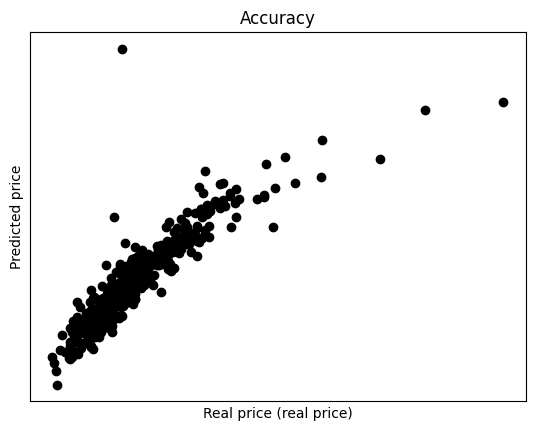

In [95]:
## Compute Accuracy
y_pred = regr.predict(valid_features_X_df[retained_columns])
y_test = valid_categ_y_df
    

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
#plt.plot(test_features_X_df,  test_predicted_Y_df, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.tick_params(axis='both', labelsize=12, width=2, length=5)  # Style

plt.xlabel('Real price (real price)')
plt.ylabel('Predicted price')
plt.title('Accuracy')
plt.show()